# <center>**Projeto de Disciplina de Algoritmos de Clusterizacao [24E4_2]**</center>
# <center>**Aluna: Rachel Reuters**</center>

## PARTE 1- INFRAESTRUTURA

In [194]:
import platform
import sys

print("Python version:", sys.version)
print("Platform:", platform.platform())
print("Architecture:", platform.architecture())
print("Processor:", platform.processor())
print("System:", platform.system())
print("Machine:", platform.machine())
print("Release:", platform.release())
print("Node:", platform.node())


Python version: 3.9.20 (main, Oct  3 2024, 07:38:01) [MSC v.1929 64 bit (AMD64)]
Platform: Windows-10-10.0.22621-SP0
Architecture: ('64bit', 'WindowsPE')
Processor: Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
System: Windows
Machine: AMD64
Release: 10
Node: DESKTOP-4U6C9N4


In [195]:
import subprocess

def get_conda_info():
    result = subprocess.run(['conda', 'info'], stdout=subprocess.PIPE)
    print(result.stdout.decode('utf-8'))

print("Conda Info:")
get_conda_info()


Conda Info:

     active environment : py39
    active env location : C:\Users\belch\anaconda3\envs\py39
            shell level : 1
       user config file : C:\Users\belch\.condarc
 populated config files : C:\Users\belch\.condarc
          conda version : 24.5.0
    conda-build version : 24.5.1
         python version : 3.12.4.final.0
                 solver : libmamba (default)
       virtual packages : __archspec=1=skylake
                          __conda=24.5.0=0
                          __cuda=12.6=0
                          __win=0=0
       base environment : C:\Users\belch\anaconda3  (writable)
      conda av data dir : C:\Users\belch\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                        

In [196]:

with open('requirements.txt', 'r') as file:
    requirements = file.read()

print(requirements)


matplotlib==3.9.2
numpy==1.26.4
pandas==2.2.1
scikit-learn==1.5.2
scipy==1.13.1
seaborn==0.13.2
scikit-learn-extra==0.3.0



## PARTE 2 - ESCOLHA DA BASE DE DADOS

Numero de Paises do dataset:  167


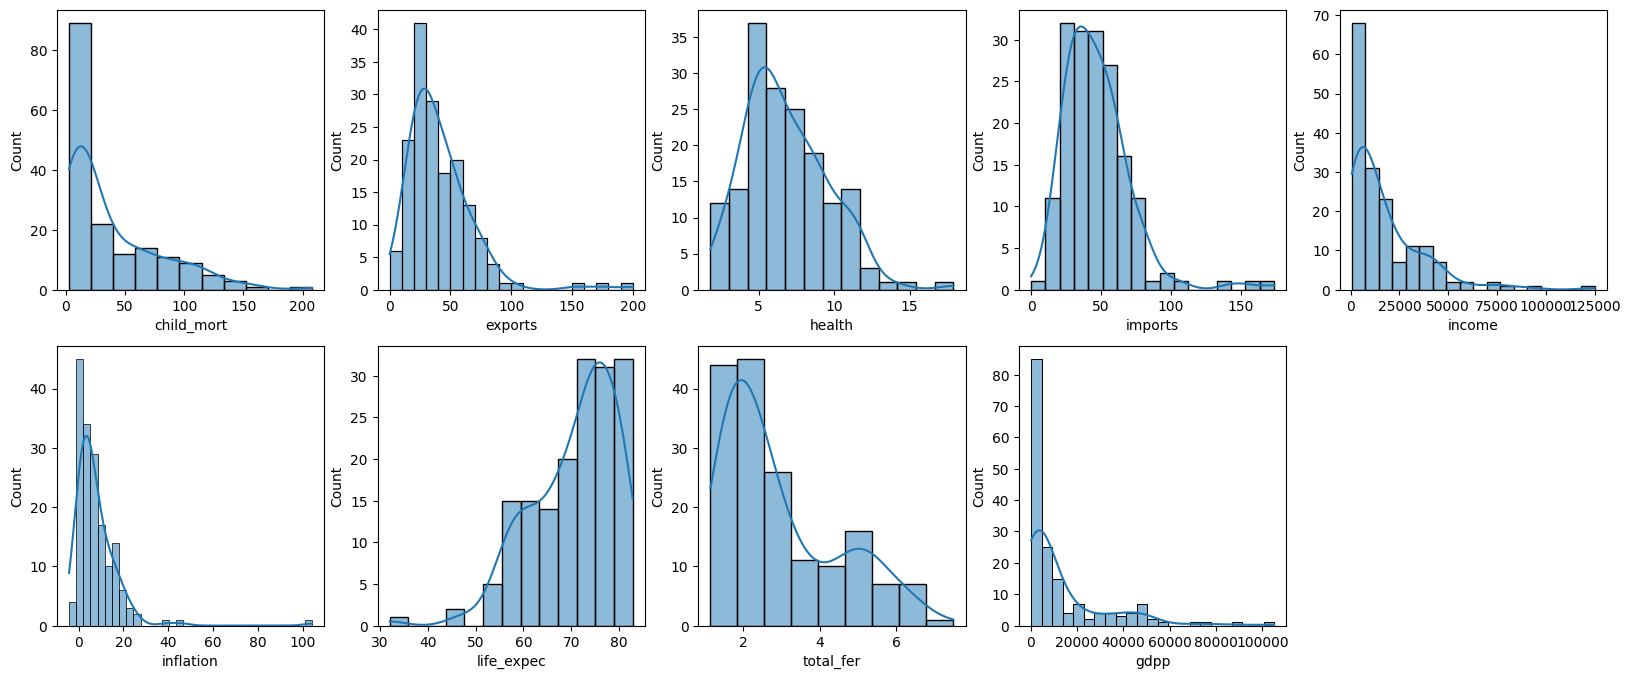

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt 
import seaborn as sns

#PARTE 2.1
#Baixe os dados disponibilizados na plataforma Kaggle
dataset = pd.read_csv('country-data.csv', sep=',', decimal='.')

nome_paises = dataset['country'].to_list()

#PARTE 2.2
#Quantos países existem no dataset?

print("Numero de Paises do dataset: ", dataset.shape[0])

#Remover a coluna de nome 
dataset.drop(dataset.columns[0], axis=1,inplace=True )

#PARTE 2.3
#Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização.
# Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

#Podemos observar que temos uma coluna de string referente ao nome do pais.
#Acredito que podemos desconsiderar a coluna de nome do pais. Pois ela so acaba servindo como se fosse um indice, nao acrescenta informacao. 
#Para os demais atributos, precisamos verificar se existem valores faltantes. 
#Tambem 'e interessante verificar se existem valores duplicados (para esse caso nao faz sentido ter linha duplicada para o mesmo pais)
#As outras 9 colunas todas precisam ser normalizadas pois estao com diferentes faixas de valores. Para que consiga inferir dados relevantes
#'e necessario  que todos estejam na mesma faixa de valores, para que nao exista distincao de pesos entre cada propriedade.\
 

plt.figure(figsize=(20, 8))

for index, value in enumerate(dataset.columns):
    plt.subplot(2, 5,index+1)
    sns.histplot(dataset[value], kde=True)





Dados faltantes:
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64
Dados duplicados:
0
Verificando os tipos de cada atributo:
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


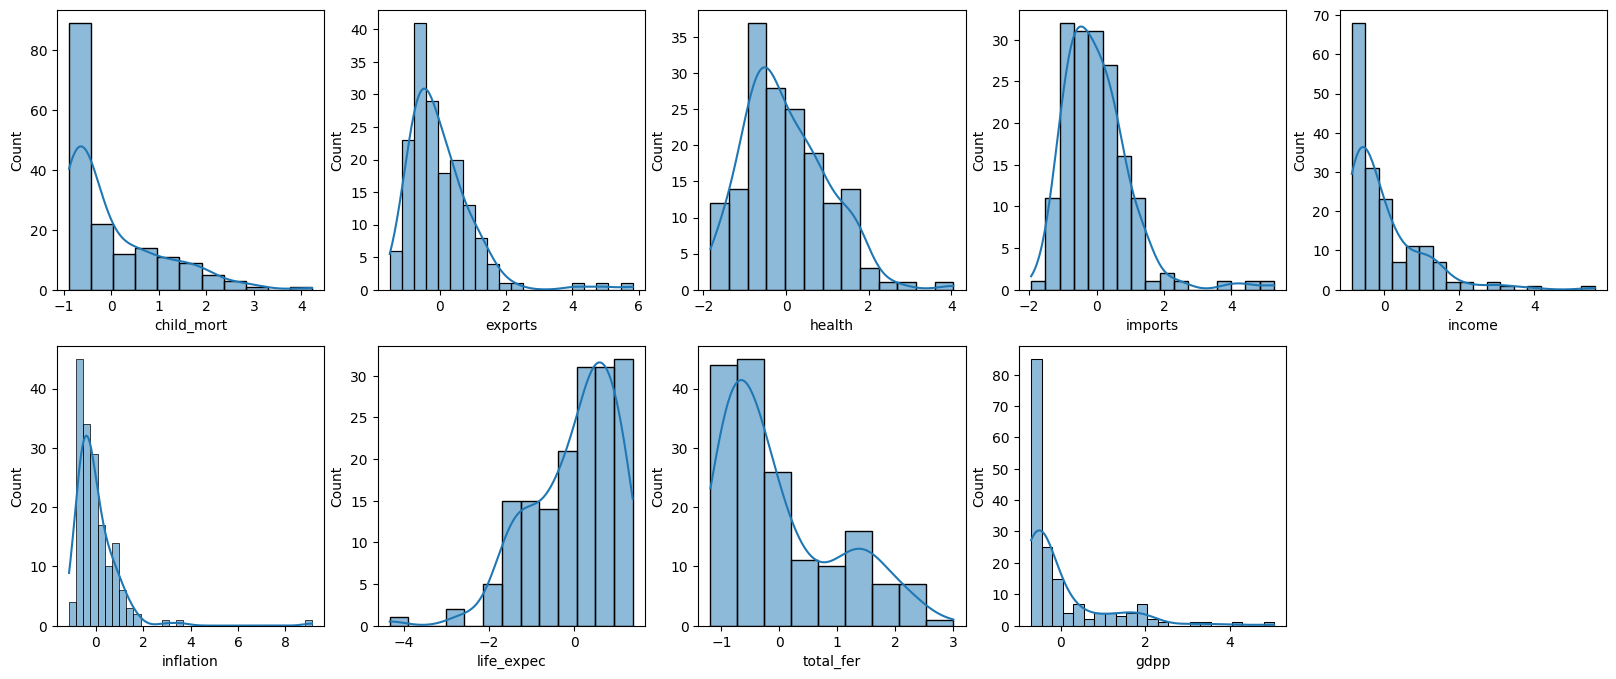

In [198]:
#PARTE 2.4 
#Realize o pré-processamento adequado dos dados.

#Primeiro verificar se tem nulos
print("Dados faltantes:")
print(dataset.isna().sum())

#Depois verificar se tem duplicados
print("Dados duplicados:")
print(dataset.duplicated().sum())


print("Verificando os tipos de cada atributo:")
print(dataset.dtypes)
#Em seguida 'e necessario normalizar os dados para que todos os atributos fiquem na mesma faixa 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset)
dataset_transformed = scaler.transform(dataset)

dataframe_transformed  = pd.DataFrame(dataset_transformed)
#Plotando nova distribuicao
plt.figure(figsize=(20, 8))

for index, value in enumerate(dataset.columns):
    plt.subplot(2, 5,index+1)
    sns.histplot(dataframe_transformed[index], kde=True )
    plt.xlabel(dataset.columns[index])





## PARTE 3 - CLUSTERIZAÇÃO

In [199]:
#Parte 3.1.a
#Agrupamento em 3 grupos  usando K-MEDIAS
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=22)
model= kmeans.fit(dataset_transformed)
y_kmeans = kmeans.predict(dataset_transformed)

#Parte 3.2
#Interpretacao e distribuicao dos resultados
resultado_k_means = pd.DataFrame(y_kmeans)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
resultado_k_means = resultado_k_means.rename(columns={0: 'Categoria'})                       
resultado_k_means['Pais'] = nome_paises

resultado_k_means = resultado_k_means.sort_values(by='Categoria')

print(resultado_k_means)

#Como ja sabemos como alguns paises se classificam, 
#podemos chegar a conclusao que as categorias estao separando em nivel de desenvolvimento do pais
#Grupo 0 = em desenvolvimento
#Grupo 1 = sub-desenvolvidos
#Grupo 2 = desenvolvidos

#Para verificar o pais que mais representa o agrupamento podemos 
#verificar a distancia de cada pais para o centro do cluster 
#o que tiver a menor distancia e o que mais representa 
distances = kmeans.transform(dataset_transformed)
distancias = pd.DataFrame(distances)

mais_proximos = []
mais_proximos = pd.DataFrame(mais_proximos)
mais_proximos['Categoria']=list(set(resultado_k_means['Categoria']))

coluna =0
for center in range(len(kmeans.cluster_centers_)):
    distancia_coluna = distancias[coluna].tolist()
    _index = np.argmin(distancia_coluna)
    mais_proximos.at[coluna, 'Pais que + representa'] = nome_paises[_index]
    mais_proximos.at[coluna, 'Distancia'] = distancias[coluna][_index]
    coluna+=1

print("Pontos mais próximos dos centroides:\n", mais_proximos)

     Categoria                            Pais
83           0                 Kyrgyz Republic
119          0                            Peru
67           0                         Hungary
120          0                     Philippines
65           0                          Guyana
121          0                          Poland
124          0                         Romania
62           0                       Guatemala
61           0                         Grenada
125          0                          Russia
127          0                           Samoa
57           0                         Georgia
128          0                    Saudi Arabia
130          0                          Serbia
131          0                      Seychelles
52           0                            Fiji
51           0                         Estonia
100          0                       Mauritius
48           0                     El Salvador
47           0                           Egypt
69           

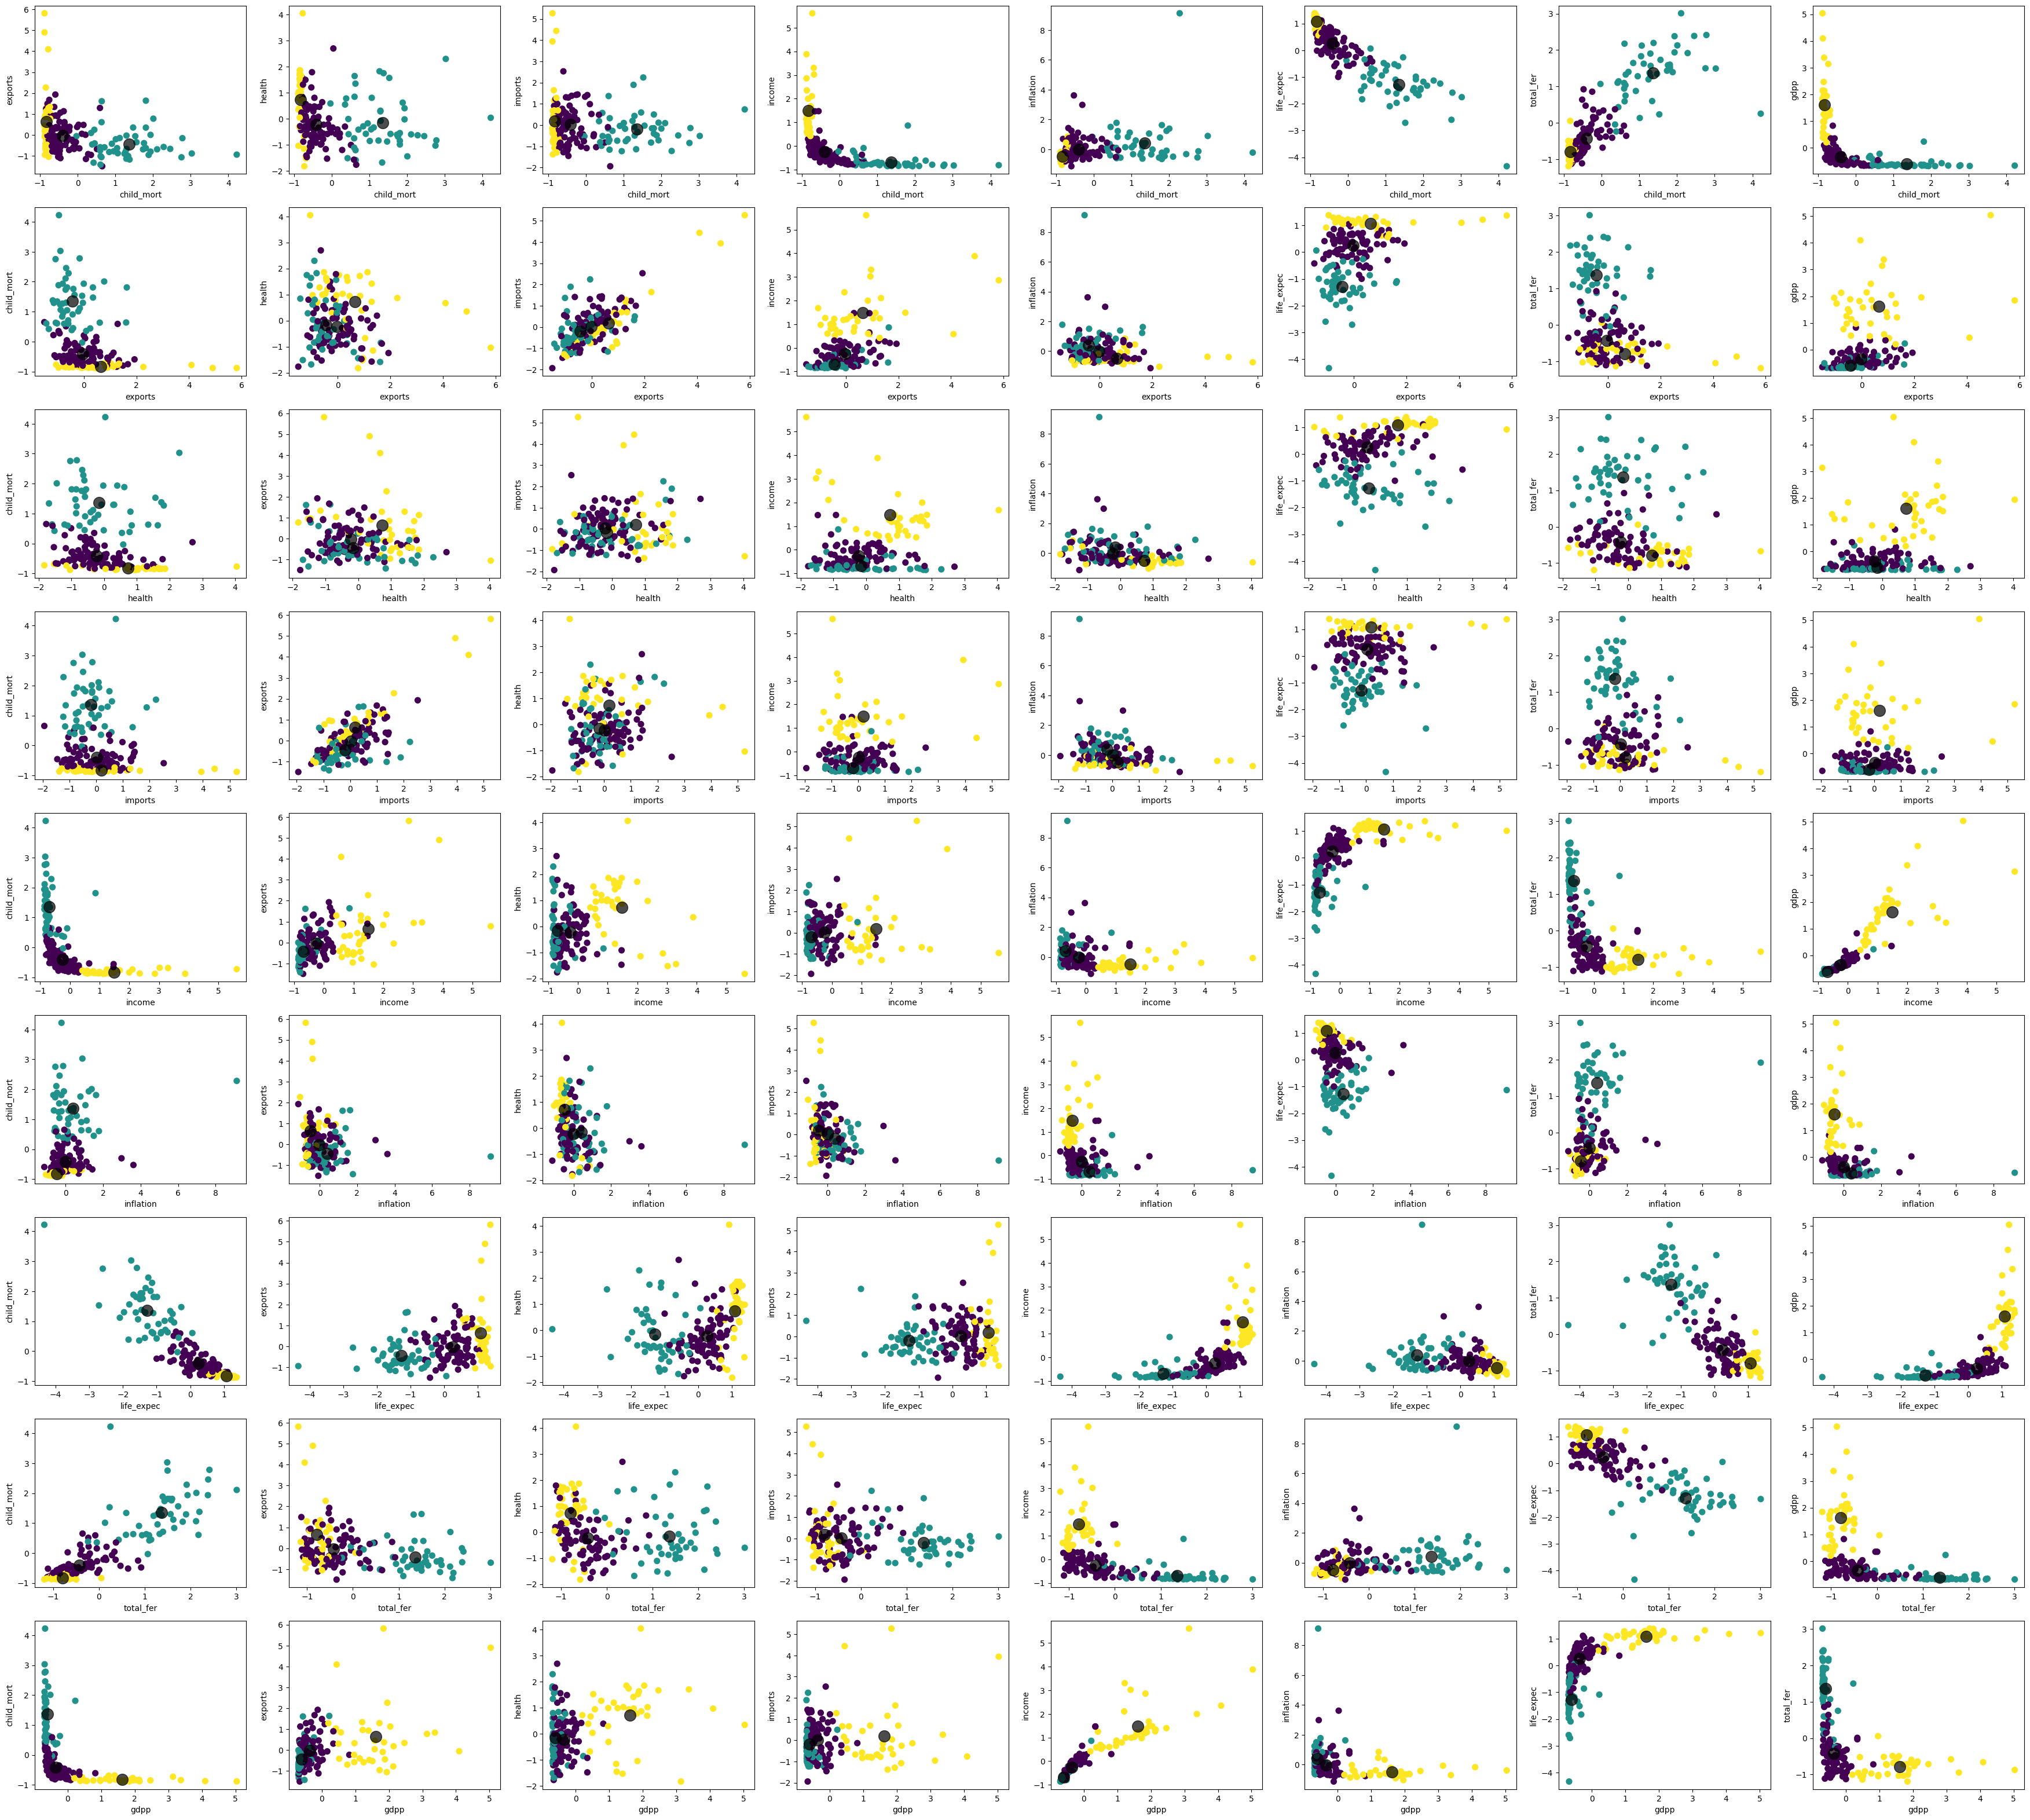

In [200]:
centers = kmeans.cluster_centers_

plt.figure(figsize=(50, 40))
index=0
for col1 in dataframe_transformed.columns:
    for col2 in dataframe_transformed.columns:
        if col1 != col2:
            index+=1
            plt.subplot(9,9,index)
            plt.scatter(dataframe_transformed[col1], dataframe_transformed[col2], c=y_kmeans, s=50, cmap='viridis')
            plt.xlabel(dataset.columns[col1])
            plt.ylabel(dataset.columns[col2])
            plt.scatter(centers[:, col1], centers[:, col2], c='black', s=200, alpha=0.7)
    index+=1

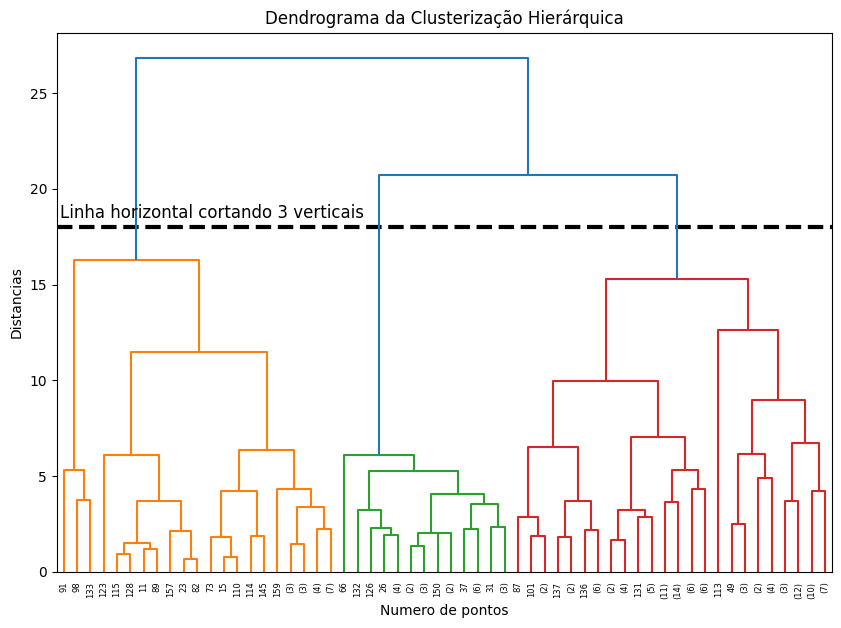

In [201]:
#Parte 3.1.b
#Agrupamento em 3 grupos  usando Clusterizacao Hierarquica
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    return dendrogram(linkage_matrix, **kwargs)

#Parte 3.3  Para os resultados da Clusterização Hierárquica, apresente o dendograma
cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = cluster.fit(dataset_transformed)

plt.figure(figsize=(10, 7))
plt.title('Dendrograma da Clusterização Hierárquica')
plt.ylabel('Distancias')
plt.hlines(y=18,xmin=0,xmax=2000,lw=3,linestyles='--',colors='black' )
plt.text(x=2,y=18.5,s='Linha horizontal cortando 3 verticais',fontsize=12)
#plt.grid(True)
dendro=plot_dendrogram(model, truncate_mode='level', p=6)
plt.xlabel("Numero de pontos")
plt.show()


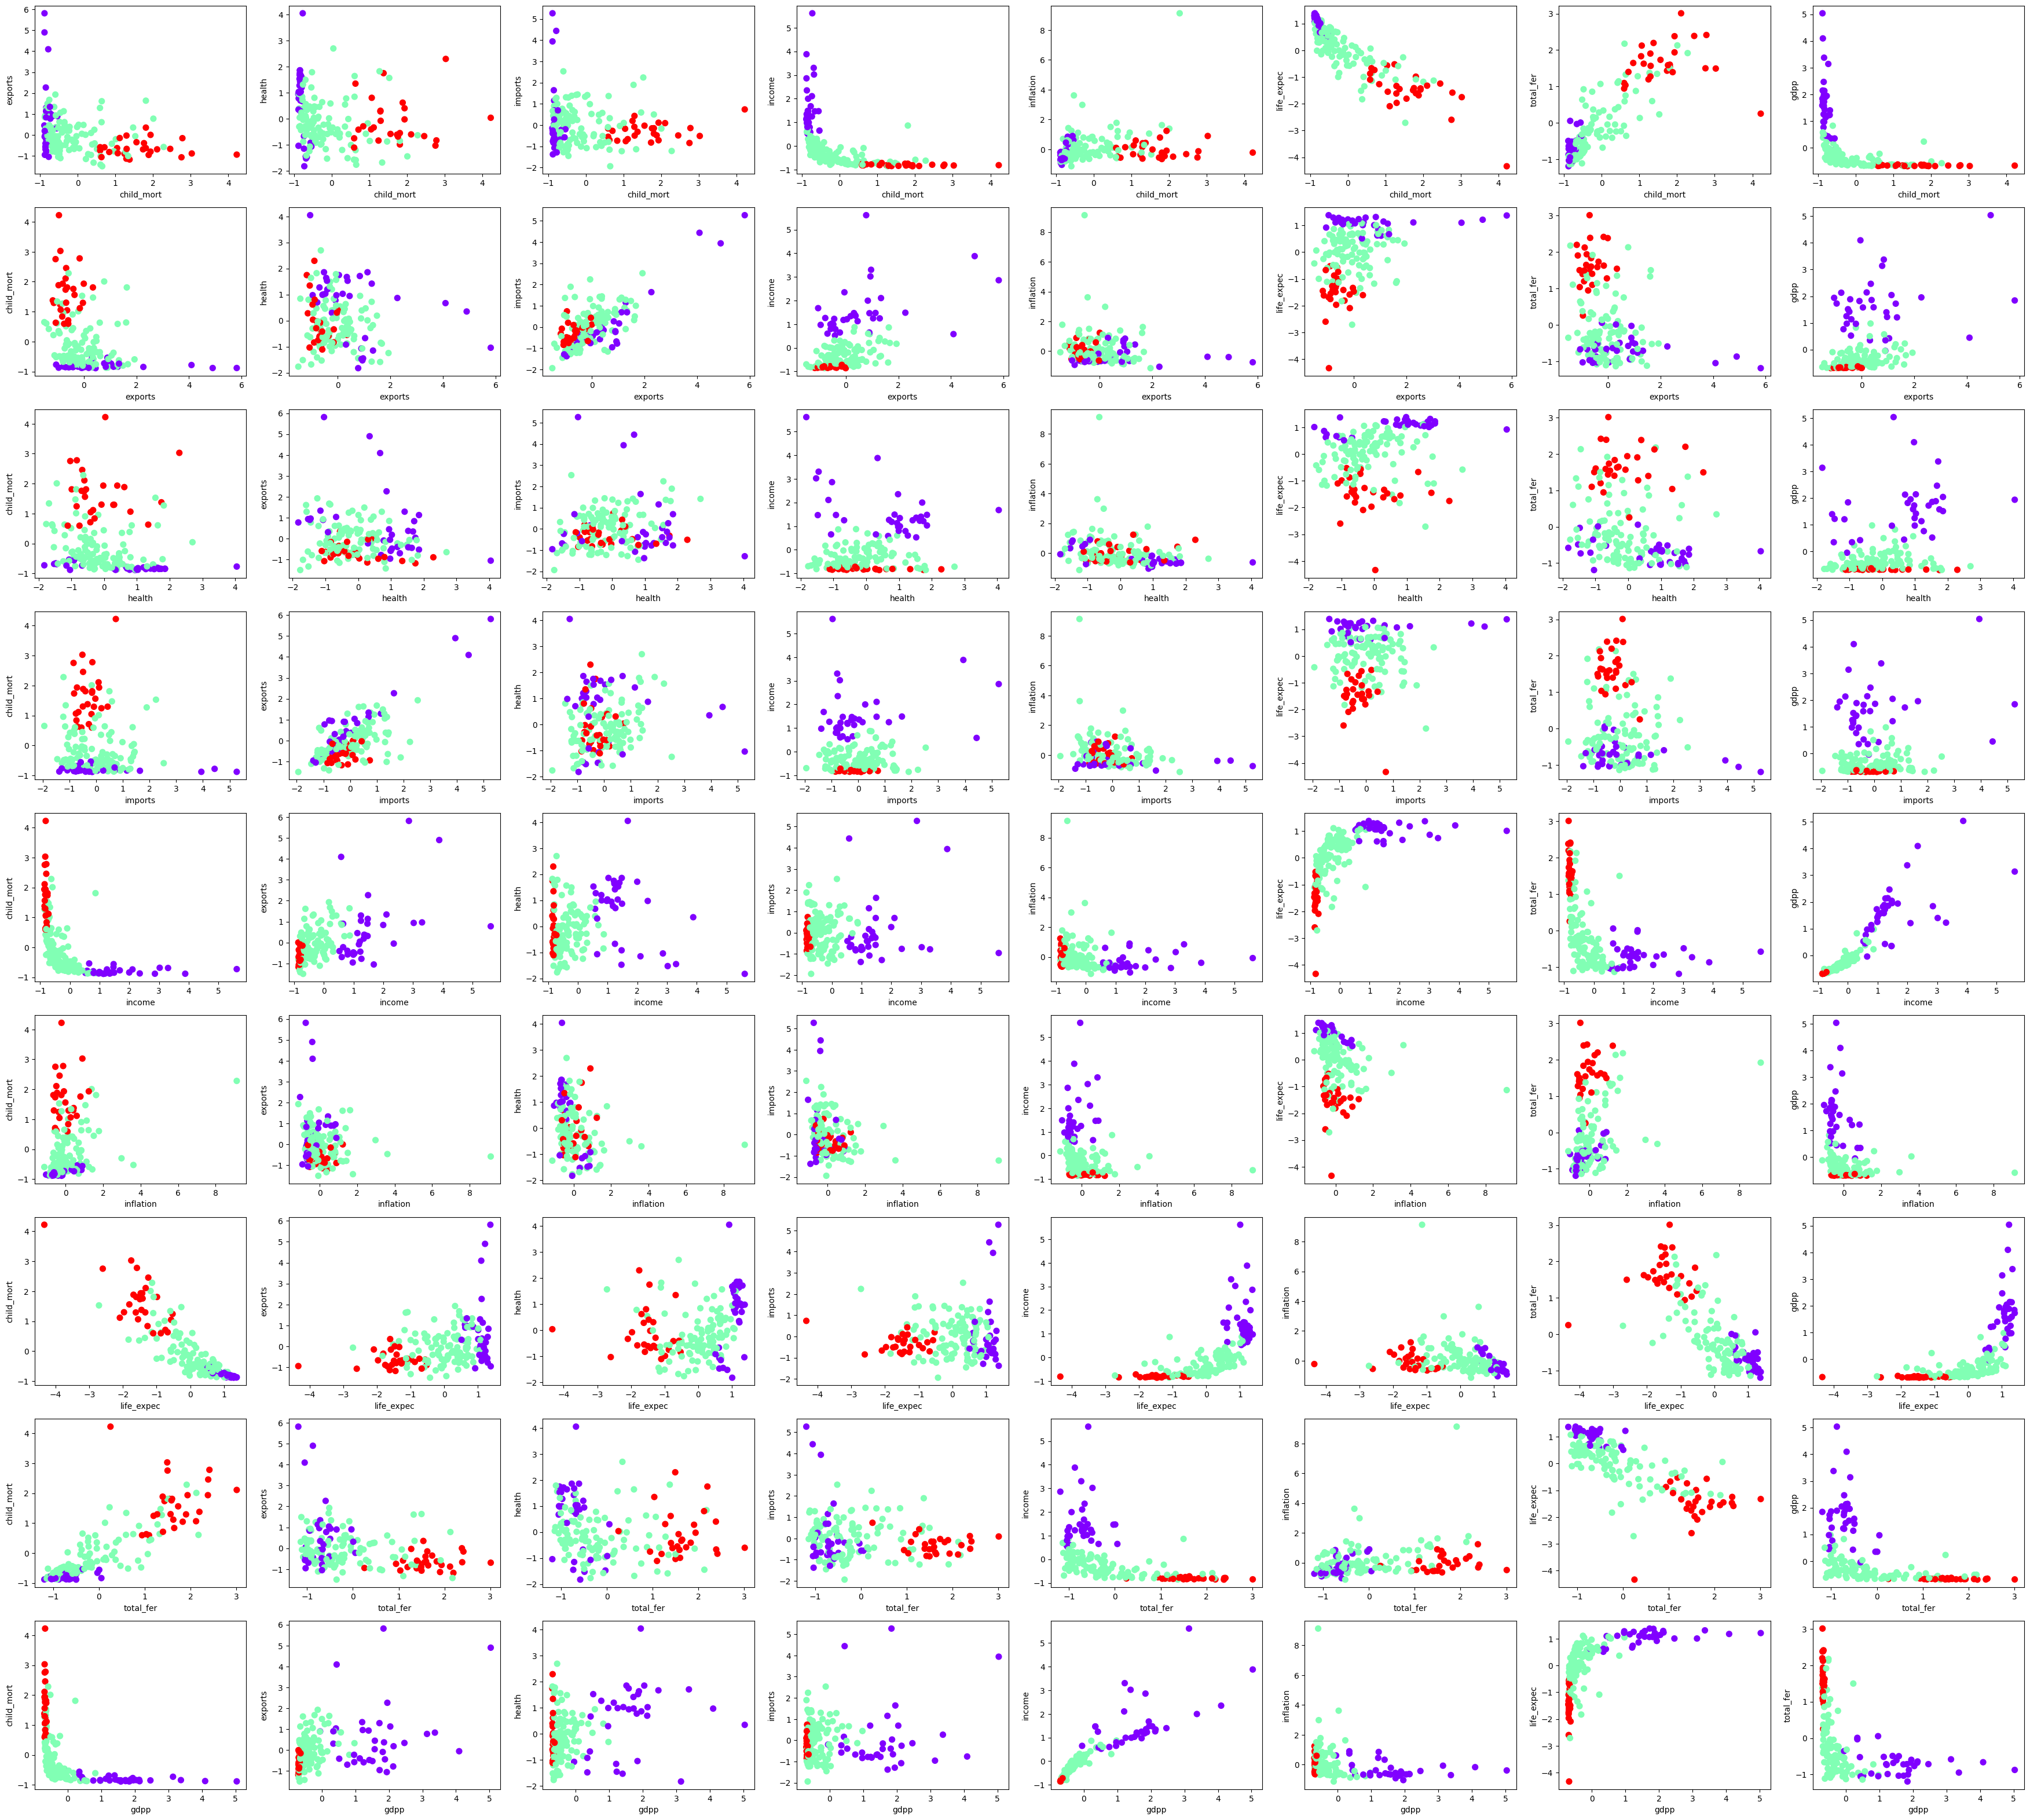

In [202]:

#Resultado da clusterizacao 
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward', compute_distances=True)

cluster_result = cluster.fit_predict(dataset_transformed)

plt.figure(figsize=(50, 40))
index=0
for col1 in dataframe_transformed.columns:
    for col2 in dataframe_transformed.columns:
        if col1 != col2:
            index+=1
            plt.subplot(9,9,index)
            plt.scatter(dataframe_transformed[col1], dataframe_transformed[col2], c=cluster.labels_, s=50, cmap='rainbow')
            plt.xlabel(dataset.columns[col1])
            plt.ylabel(dataset.columns[col2])            
    index+=1


In [203]:
#3.3 Para os resultados da Clusterização Hierárquica interprete os resultados
resultado_hierarquico = pd.DataFrame(cluster_result)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
resultado_hierarquico = resultado_hierarquico.rename(columns={0: 'Categoria'})                       
resultado_hierarquico['Pais'] = nome_paises

resultado_hierarquico = resultado_hierarquico.sort_values(by='Categoria')

print(resultado_hierarquico)

#Como ja sabemos como alguns paises se classificam, 
#podemos chegar a conclusao que as categorias estao separando em nivel de desenvolvimento do pais
#Grupo 0 = desenvolvidos
#Grupo 1 = em desenvolvimento
#Grupo 2 = sub-desenvolvidos


     Categoria                            Pais
111          0                     New Zealand
89           0                           Libya
91           0                      Luxembourg
29           0                          Canada
60           0                          Greece
159          0                   United States
115          0                            Oman
114          0                          Norway
23           0                          Brunei
58           0                         Germany
157          0            United Arab Emirates
77           0                           Japan
110          0                     Netherlands
54           0                          France
44           0                         Denmark
53           0                         Finland
98           0                           Malta
158          0                  United Kingdom
123          0                           Qatar
122          0                        Portugal
133          

In [204]:
#3.4 - Compare os dois resultados, aponte as semelhanças e diferenças e interprete.
# Para comparar corretamente, temos que colocar os nomes das categorias de forma equivalente. 
#Atualmente temos:
#Hierarquico
#Grupo 0 = desenvolvidos
#Grupo 1 = em desenvolvimento
#Grupo 2 = sub-desenvolvidos

#Kmeans
#Grupo 0 = em desenvolvimento
#Grupo 1 = sub-desenvolvidos
#Grupo 2 = desenvolvidos

resultado_hierarquico = resultado_hierarquico.replace({0: 2, 1: 0, 2: 1})


resultado_comparativo = resultado_hierarquico.sort_values(by='Pais')

resultado_comparativo['K_means'] = resultado_k_means.sort_values(by='Pais')['Categoria'].tolist()

resultado_comparativo.rename(columns={'Categoria':'Clusterizacao Hierarquica'},inplace=True)

resultado_comparativo = resultado_comparativo[['Pais', 'K_means', 'Clusterizacao Hierarquica']]

resultado_comparativo

Pais  K_means  Clusterizacao Hierarquica
0                       Afghanistan        1                          1
1                           Albania        0                          0
2                           Algeria        0                          0
3                            Angola        1                          0
4               Antigua and Barbuda        0                          0
5                         Argentina        0                          0
6                           Armenia        0                          0
7                         Australia        2                          2
8                           Austria        2                          2
9                        Azerbaijan        0                          0
10                          Bahamas        0                          0
11                          Bahrain        2                          2
12                       Bangladesh        0                          0
13                         Barbados        0                          0
14                          Belarus        0                          0
15                          Belgium        2                          2
16                           Belize        0                          0
17                            Benin        1                          1
18                           Bhutan        0                          0
19                          Bolivia        0                          0
20           Bosnia and Herzegovina        0                          0
21                         Botswana        1                          0
22                           Brazil        0                          0
23                           Brunei        2                          2
24                         Bulgaria        0                          0
25                     Burkina Faso        1                          1
26                          Burundi        1                          1
27                         Cambodia        0                          0
28                         Cameroon        1                          1
29                           Canada        2                          2
30                       Cape Verde        0                          0
31         Central African Republic        1                          1
32                             Chad        1                          1
33                            Chile        0                          0
34                            China        0                          0
35                         Colombia        0                          0
36                          Comoros        1                          1
37                 Congo, Dem. Rep.        1                          1
38                      Congo, Rep.        1                          0
39                       Costa Rica        0                          0
40                    Cote d'Ivoire        1                          1
41                          Croatia        0                          0
42                           Cyprus        2                          0
43                   Czech Republic        2                          0
44                          Denmark        2                          2
45               Dominican Republic        0                          0
46                          Ecuador        0                          0
47                            Egypt        0                          0
48                      El Salvador        0                          0
49                Equatorial Guinea        1                          0
50                          Eritrea        1                          0
51                          Estonia        0                          0
52                             Fiji        0                          0
53                          Finland        2                          2
54                           France        2                          2

In [205]:
#Verificando o percentual de similaridade entre os 2 algoritmos:

import difflib

kmeans_lista = resultado_comparativo['K_means'].tolist()
hierarquico_lista = resultado_comparativo['Clusterizacao Hierarquica'].tolist()

sm=difflib.SequenceMatcher(None,kmeans_lista,hierarquico_lista)
similaridade= sm.ratio()*100
 
# Print the result
print("Similaridade entre os resultados dos algoritmos : {:.2f}".format(similaridade))

Similaridade entre os resultados dos algoritmos : 83.83


## PARTE 4 - ESCOLHA DE ALGORITMOS

In [206]:
#Parte 4.1-Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.
#1) Inicializa com o numero K de clusters em que cada centroide inicial 'e aleatoriamente escolhido 
#   Por isso para que haja reprodutibilidade 'e importante configurar o seed inicial tambem. 
#2) Para cada ponto do dado calcula a distancia ate os K centroides e vincula os pontos 
#   pros seus correspondentes  clusters.
#3) Em cada K cluster calcula a media dos pontos que estao dentro do cluster e atualiza a posicao 
# dos centroide para essas medias 
#4) O processo e repetido ate que os centroides comecem a nao mudar ou mudar muito pouco

In [207]:
#Parte 4.2-Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado 
#  pelo dado mais próximo  ao seu baricentro em todas as iterações do algoritmo.

# Para isso utilizarei o algoritmo do Kmedoide que utiliza um ponto real do conjunto de dados ( medoide)
#  que minimiza a soma das distâncias entre ele e todos os outros pontos do cluster
from sklearn_extra.cluster import KMedoids

kmedoide = KMedoids(n_clusters=3, random_state=22, init='k-medoids++') 
kmedoide_model= kmedoide.fit(dataset_transformed)

y_kmedoide = kmedoide.predict(dataset_transformed)

resultado_kmedoide = pd.DataFrame(y_kmedoide)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
resultado_kmedoide = resultado_kmedoide.rename(columns={0: 'Categoria'})                       
resultado_kmedoide['Pais'] = nome_paises

resultado_kmedoide = resultado_kmedoide.sort_values(by='Categoria')

print(resultado_kmedoide)

#Como ja sabemos como alguns paises se classificam, 
#podemos chegar a conclusao que as categorias estao separando em nivel de desenvolvimento do pais
#Grupo 0 = desenvolvidos
#Grupo 1 = sub-desenvolvidos
#Grupo 2 = em desenvolvimento

#Para verificar o pais que mais representa o agrupamento podemos 
#verificar a distancia de cada pais para o centro do cluster 
#o que tiver a menor distancia e o que mais representa 
distances_kmedoide = kmedoide.transform(dataset_transformed)
distances_kmedoide = pd.DataFrame(distances_kmedoide)

mais_proximos_kmedoide = []
mais_proximos_kmedoide = pd.DataFrame(mais_proximos)
mais_proximos_kmedoide['Categoria']=list(set(resultado_kmedoide['Categoria']))

coluna =0
for center in range(len(kmedoide.cluster_centers_)):
    distancia_coluna = distances_kmedoide[coluna].tolist()
    _index = np.argmin(distancia_coluna)
    mais_proximos_kmedoide.at[coluna, 'Pais que + representa'] = nome_paises[_index]
    mais_proximos_kmedoide.at[coluna, 'Distancia'] = distances_kmedoide[coluna][_index]
    coluna+=1

print("Pontos mais próximos dos centroides no kmedoide:\n", mais_proximos_kmedoide)



     Categoria                            Pais
131          0                      Seychelles
122          0                        Portugal
60           0                          Greece
58           0                         Germany
54           0                          France
53           0                         Finland
130          0                          Serbia
51           0                         Estonia
100          0                       Mauritius
133          0                       Singapore
134          0                 Slovak Republic
135          0                        Slovenia
44           0                         Denmark
43           0                  Czech Republic
42           0                          Cyprus
41           0                         Croatia
121          0                          Poland
138          0                     South Korea
67           0                         Hungary
117          0                          Panama
98           

In [208]:

resultado_comparativo['KMedoide']=resultado_kmedoide.sort_values(by='Pais')['Categoria'].tolist()

resultado_comparativo['KMedoide']= resultado_comparativo['KMedoide'].replace({0: 2,  2: 0})
print(resultado_comparativo)
#Verificando o percentual de similaridade entre os 3 algoritmos (2 a 2):

import difflib

kmeans_lista = resultado_comparativo['K_means'].tolist()
KMedoide_lista = resultado_comparativo['KMedoide'].tolist()
hierarquico_lista=  resultado_comparativo['Clusterizacao Hierarquica'].tolist()

sm=difflib.SequenceMatcher(None,kmeans_lista,KMedoide_lista)
similaridade= sm.ratio()*100
 
# Print the result
print("Similaridade entre KMEANS e KMEDOIDE : {:.2f}".format(similaridade))

sm=difflib.SequenceMatcher(None,hierarquico_lista,KMedoide_lista)
similaridade= sm.ratio()*100
print("Similaridade entre HIERARQUICO e KMEDOIDE : {:.2f}".format(similaridade))


                               Pais  K_means  Clusterizacao Hierarquica  \
0                       Afghanistan        1                          1   
1                           Albania        0                          0   
2                           Algeria        0                          0   
3                            Angola        1                          0   
4               Antigua and Barbuda        0                          0   
5                         Argentina        0                          0   
6                           Armenia        0                          0   
7                         Australia        2                          2   
8                           Austria        2                          2   
9                        Azerbaijan        0                          0   
10                          Bahamas        0                          0   
11                          Bahrain        2                          2   
12                       

In [209]:
#Parte 4.3-  O algoritmo de K-médias é sensível a   outliers nos dados. Explique.
# Pois a logica do algoritmo do Kmeans se basea no calculo das medias, entao 
# a presença de outliers pode deslocar os centroides para longe dos verdadeiros centros dos clusters.
# Alem disso, com um provavel deslocamento dos centroides, alguns pontos podem ser atribuídos a
#  clusters que nao representam bem a sua localizacao real nos dados.

In [210]:
#Parte 4.4 - Por que o algoritmo de DBScan é mais robusto à presença de outliers?
# O DBScan identifica pontos que nao pertencem a nenhum cluster como ruído. Isso ocorre
# pois o algoritmo do dbscan 'e baseado na densidade de pontos numa determinada area. 
# Logo, um outlier nao vai ter pontos proximos, logo nao tera vizinhos proximos. 
# Isso 'e, esses pontos nao vao influenciar a formacao dos clusters.

In [211]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=4)
dbscan_model= dbscan.fit(dataframe_transformed)

dbscan_labels = dbscan.labels_

dbscan_labels

array([ 0,  1,  1, -1,  1,  1,  1,  2,  2,  1,  1, -1,  1,  1, -1, -1,  1,
        0,  1,  1,  1,  1,  1, -1,  1,  0, -1,  1,  0,  2,  1, -1,  0,  1,
        1,  1,  0, -1, -1,  1,  0,  1,  1,  1,  2,  1,  1,  1,  1, -1, -1,
        1,  1,  2,  2, -1,  0,  1,  2,  0,  2,  1,  1,  0,  0,  1, -1,  1,
        2,  1,  1,  1, -1, -1,  2,  2,  1,  2, -1,  1,  0, -1, -1,  1,  0,
        1,  1, -1, -1, -1,  1, -1,  1,  0,  0,  1,  1,  0, -1, -1,  1, -1,
       -1, -1,  1,  1,  0, -1,  1,  1,  2,  2,  0, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  2, -1,  1,  1, -1,  1, -1,  0,  1, -1, -1, -1,  1,  1,
       -1, -1,  1,  2,  1,  1, -1,  1,  2, -1,  1,  0,  1, -1, -1, -1,  1,
        1, -1,  0,  1, -1,  2, -1,  1,  1,  1, -1, -1,  0,  0],
      dtype=int64)